train size= 3139
validation size= 554
50
Epoch 1/50, Train Loss: 1.5866571116447448, Train Acc: 29.181267919719655%, Val Loss: 1.8189237117767334, Val Acc: 29.602888086642597%
Epoch 2/50, Train Loss: 1.4280472254753114, Train Acc: 32.080280344058615%, Val Loss: 1.3884219990836248, Val Acc: 28.339350180505413%
Epoch 3/50, Train Loss: 1.3318949723243714, Train Acc: 37.464160560688114%, Val Loss: 1.357440299457974, Val Acc: 33.935018050541515%
Epoch 4/50, Train Loss: 1.3396251392364502, Train Acc: 36.572156737814595%, Val Loss: 1.2901102834277682, Val Acc: 36.462093862815884%
Epoch 5/50, Train Loss: 1.218974916934967, Train Acc: 43.580758203249445%, Val Loss: 1.1416578226619296, Val Acc: 45.84837545126354%
Epoch 6/50, Train Loss: 1.134919329881668, Train Acc: 46.60719974514176%, Val Loss: 1.2229452000723944, Val Acc: 40.61371841155235%
Epoch 7/50, Train Loss: 1.0748929691314697, Train Acc: 48.32749283211214%, Val Loss: 1.0577927629152934, Val Acc: 52.166064981949454%
Epoch 8/50, Train Los

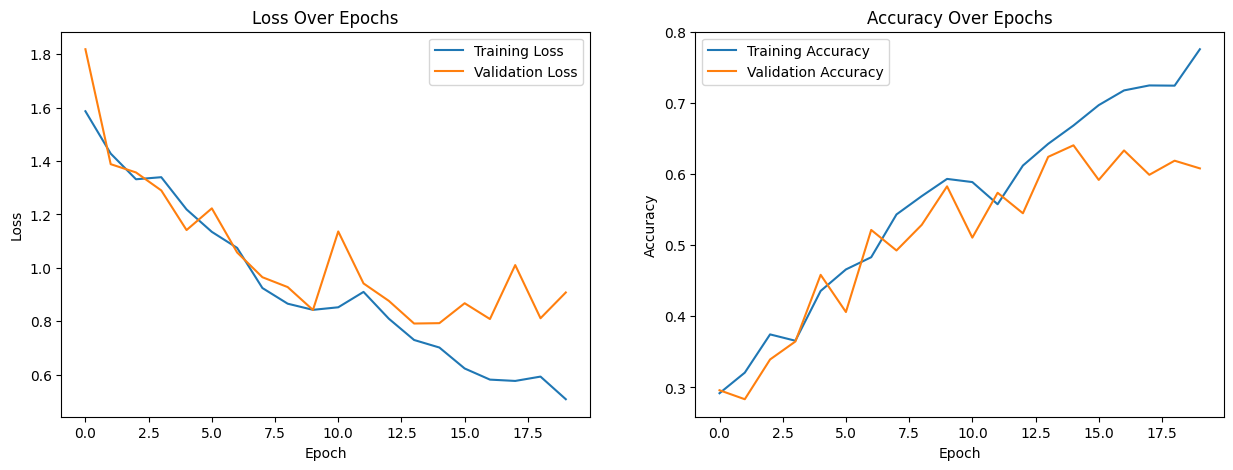

In [2]:
import torch
from torch import optim, nn

from Model.model import MultiLayerFCNet
from DataLoder.dataLoader import custom_loader
from TrainUtils.train_utils import train_epoch, validate_epoch
import Config.config as config
from Utils.utils import save_model, plot_training_results

if __name__ == '__main__':

    train_loader, val_loader = custom_loader(config.BATCH_SIZE, config.TRAIN_DATA_PATH)

    model = MultiLayerFCNet(config.INPUT_SIZE, config.HIDDEN_SIZE, config.OUTPUT_SIZE)
    model = nn.DataParallel(model)
    model.to(config.DEVICE)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), config.LEARNING_RATE)
    best_acc = 0
    no_improve_epochs = 0
    patience = 5  # Set the patience for early stopping

    train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

    print(config.EPOCHS)

    for epoch in range(config.EPOCHS):
        train_loss, train_accuracy = train_epoch(model, train_loader, criterion, optimizer, config.DEVICE)
        val_loss, val_accuracy = validate_epoch(model, val_loader, criterion, config.DEVICE)

        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Save the best model
        if val_accuracy > best_acc:
            best_acc = val_accuracy
            no_improve_epochs = 0
            save_model(model, config.STOP_MODEL_SAVE_PATH)
        else:
            no_improve_epochs += 1
            
        
        if no_improve_epochs >= patience:
            print("Early stopping triggered")
            break

        print(f"Epoch {epoch + 1}/{config.EPOCHS}, Train Loss: {train_loss}, Train Acc: {train_accuracy * 100}%, Val Loss: {val_loss}, Val Acc: {val_accuracy * 100}%")

    # Plotting using utility function
    plot_training_results(train_losses, val_losses, train_accuracies, val_accuracies)
